In [188]:
'''
neural network classifier:constructing a neural network classifier 
                          and using it to test the classification performance of an optimal subset of features
input：optimal feature subset of each dataset(file is of type csv)
output:plots and values of accuracy and loss
'''

In [ ]:
import pandas as pd
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
import datetime

In [189]:
df = pd.read_csv('grape_feature.csv',header=None)
dataset = df.values
X = dataset[:,[17,26,29,30,42,44,46,54,58,74,80,84,85,95,111,113,119,123,123,124,132,134,136,144,145,152,157,158,160,162,163]]
#X = dataset[:,0:171]
Y = dataset[:,171]
print('X shape:',X.shape)
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


num_classes = 3

X shape: (2400, 31)


In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, train_size=0.8, test_size=0.2, random_state=0)

In [191]:
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

In [192]:
model = Sequential([
    #Dense(64, activation='relu', input_dim=171),
    Dense(128, activation='relu', input_dim=31),
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid'),
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 128)               4096      
_________________________________________________________________
dense_126 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_127 (Dense)            (None, 3)                 99        
Total params: 8,323
Trainable params: 8,323
Non-trainable params: 0
_________________________________________________________________


In [193]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
a = datetime.datetime.now()           


hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=200,
          validation_data=(X_test, Y_test))
b = datetime.datetime.now()
c = b - a
print( int(c.total_seconds()))

Train on 1920 samples, validate on 480 samples
Epoch 1/500
1920/1920 [==============================] - 3s 1ms/step - loss: 0.6021 - acc: 0.6613 - val_loss: 0.5486 - val_acc: 0.7403
Epoch 2/500
1920/1920 [==============================] - 0s 121us/step - loss: 0.4726 - acc: 0.7618 - val_loss: 0.4137 - val_acc: 0.8069
Epoch 3/500
1920/1920 [==============================] - 0s 124us/step - loss: 0.3622 - acc: 0.8321 - val_loss: 0.3458 - val_acc: 0.8347
Epoch 4/500
1920/1920 [==============================] - 0s 131us/step - loss: 0.2986 - acc: 0.8826 - val_loss: 0.2903 - val_acc: 0.8986
Epoch 5/500
1920/1920 [==============================] - 0s 137us/step - loss: 0.2483 - acc: 0.9175 - val_loss: 0.2511 - val_acc: 0.9097
Epoch 6/500
1920/1920 [==============================] - 0s 134us/step - loss: 0.2111 - acc: 0.9297 - val_loss: 0.2242 - val_acc: 0.9167
Epoch 7/500
1920/1920 [==============================] - 0s 128us/step - loss: 0.1904 - acc: 0.9339 - val_loss: 0.2101 - val_acc: 0.9

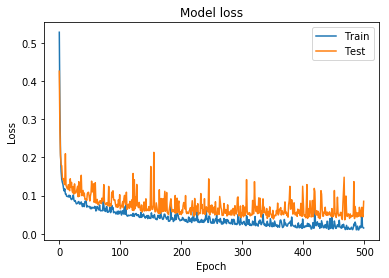

In [180]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
#plt.show()
plt.savefig('model loss.jpg',dip=300)

In [194]:
print('test acc:',model.evaluate(X_test, Y_test)[1])
print('train acc:',model.evaluate(X_train, Y_train)[1])

480/480 [==============================] - 0s 59us/step
test acc: 0.9722222367922465
1920/1920 [==============================] - 0s 48us/step
train acc: 0.9883680641651154


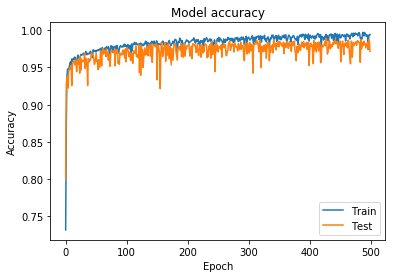

In [181]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
#plt.show()
plt.savefig('model acc.jpg',dip=300)

In [183]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 128)               22016     
_________________________________________________________________
dense_120 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_121 (Dense)            (None, 3)                 99        
Total params: 26,243
Trainable params: 26,243
Non-trainable params: 0
_________________________________________________________________
